<a id='toc'></a>

# Table of content

Dataset: <br>
https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data?resource=download


- [Libraries](#Libraries)
- [Exploratory analysis](#Exploratory_analysis)
- [Feature engineering](#Feature_engineering)
- [Creating a model](#creating_a_model)
- [Choosing optimal cluster number](#Choosing_optimal_cluster_number)
- [Evaluation](#Evaluation)
- [Visualizations](#Visualizations)


<a id='Libraries'></a>

# Libraries

In [183]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import GridSearchCV 
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score, silhouette_samples

<a id='Exploratory_analysis'></a>

# Exploratory analysis

In [184]:
# importing dataset
df = pd.read_csv("./AB_NYC_2019.csv")

In [185]:
# exploring dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [186]:
df.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.190000   
50%          3.000000           5.000000           0.720000   
75%          5.000000          24.000000           2.020000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

In [187]:
for column in df.columns:
    print(column)

id
name
host_id
host_name
neighbourhood_group
neighbourhood
latitude
longitude
room_type
price
minimum_nights
number_of_reviews
last_review
reviews_per_month
calculated_host_listings_count
availability_365


In [188]:
# droping unnecessary columns
df.drop(columns=["id", "name", "host_id", "host_name", "last_review", "reviews_per_month", "calculated_host_listings_count", "availability_365"], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   neighbourhood_group  48895 non-null  object 
 1   neighbourhood        48895 non-null  object 
 2   latitude             48895 non-null  float64
 3   longitude            48895 non-null  float64
 4   room_type            48895 non-null  object 
 5   price                48895 non-null  int64  
 6   minimum_nights       48895 non-null  int64  
 7   number_of_reviews    48895 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 3.0+ MB


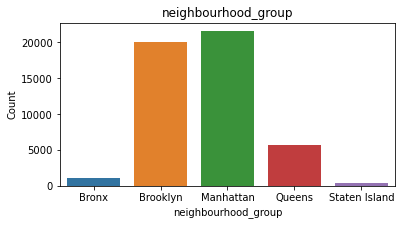

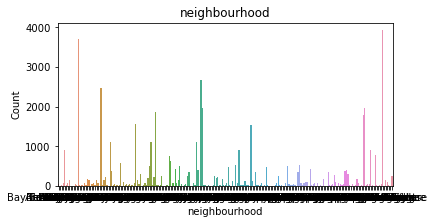

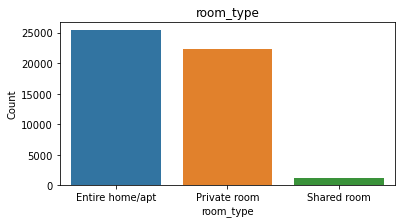

In [189]:
# check categorical columns
columns_to_visualize = ["neighbourhood_group", "neighbourhood", "room_type"]

for column in columns_to_visualize:
    chart_df = df.groupby(column)[column].agg(["count"]).reset_index()
    plt.figure(figsize=(6, 3))
    sns.barplot(x=column, y="count", data=chart_df)
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.title(column);

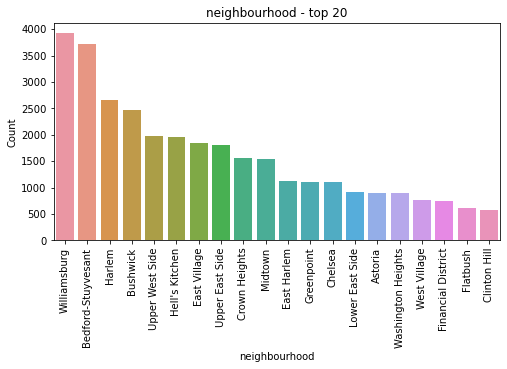

In [190]:
# exploring neighbourhood
column_name = "neighbourhood"
no_of_top_neighbourhood = 20
chart_df = df.groupby(column_name)[column_name].agg(["count"]).reset_index().sort_values(by="count", ascending=False).head(no_of_top_neighbourhood)
plt.figure(figsize=(8, 4))
sns.barplot(x=column_name, y="count", data=chart_df)
plt.xlabel(column_name)
plt.ylabel("Count")
plt.title(f"{column_name} - top {no_of_top_neighbourhood}")
plt.xticks(rotation=90);

(0.0, 300.0)

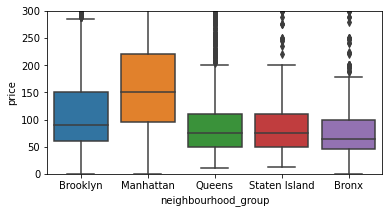

In [191]:
# exploring prices in different neighbours
plt.figure(figsize=(6, 3))
sns.boxplot(x="neighbourhood_group", y="price", data=df)
plt.ylim(0, 300)

(0.0, 300.0)

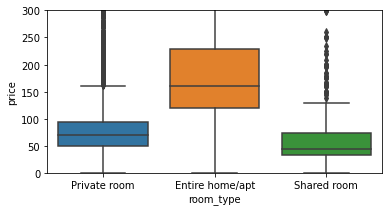

In [192]:
# exploring prices in different room type
plt.figure(figsize=(6, 3))
sns.boxplot(x="room_type", y="price", data=df)
plt.ylim(0, 300)

In [193]:
df.drop(columns=["neighbourhood"], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   neighbourhood_group  48895 non-null  object 
 1   latitude             48895 non-null  float64
 2   longitude            48895 non-null  float64
 3   room_type            48895 non-null  object 
 4   price                48895 non-null  int64  
 5   minimum_nights       48895 non-null  int64  
 6   number_of_reviews    48895 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 2.6+ MB


In [194]:
# check float and integer columns except longitute and latitude
# data is skewed and requires normalization
columns_to_check = ["price", "minimum_nights", "number_of_reviews"]

for column in columns_to_check:
    fig = px.histogram(df, x=column,
                       marginal="box",
                       width=800, height=500,
                       title=column,
                       color_discrete_sequence=['#FF6692'],
                       nbins = 30)
    fig.show()

In [195]:
# remove listings where price is 0, because it means that listng is no available at the moment
df = df[df["price"] != 0].reset_index(drop=True)

In [196]:
# check listings where number of nights > 365
df[df["minimum_nights"] > 365]

neighbourhood_group  latitude  longitude        room_type  price  \
1305             Brooklyn  40.70202  -73.92402  Entire home/apt    115   
2854            Manhattan  40.71239  -74.01620  Entire home/apt    400   
5767            Manhattan  40.73293  -73.99782  Entire home/apt    180   
7355               Queens  40.75104  -73.93863  Entire home/apt    134   
8014            Manhattan  40.82135  -73.95521  Entire home/apt     75   
10829              Queens  40.74654  -73.95778  Entire home/apt    199   
11193            Brooklyn  40.67255  -73.94914     Private room     50   
13404           Manhattan  40.82915  -73.94034  Entire home/apt     99   
14285            Brooklyn  40.64779  -73.97956     Private room     45   
15946           Manhattan  40.74513  -73.98475  Entire home/apt    250   
26332            Brooklyn  40.71772  -73.95059     Private room     79   
34476            Brooklyn  40.69974  -73.94658     Private room     50   
38653           Manhattan  40.73094  -73.99900      Shared room    110   
47609            Brooklyn  40.70898  -73.94885  Entire home/apt    140   

       minimum_nights  number_of_reviews  
1305              370                  6  
2854             1000                  0  
5767             1250                  2  
7355              500                 30  
8014              500                  0  
10829             480                  0  
11193             500                 10  
13404             999                  2  
14285             500                  0  
15946             366                  0  
26332             999                 24  
34476             400                  0  
38653             999                  0  
47609             500                  0

In [197]:
# remove listings where minimum nigts > 365 - those are outliers
df = df[df["minimum_nights"] <= 365].reset_index(drop=True)

In [198]:
# explore further price, minimum nigths and number of reviews
columns_to_check = ["price", "minimum_nights", "number_of_reviews"]
for column in columns_to_check:
    val_count = getattr(df, column).value_counts(bins=5, dropna=False)
    print(column)
    print(val_count)
    print("\n")

price
(0.009000000000000001, 2008.0]    48784
(2008.0, 4006.0]                     54
(4006.0, 6004.0]                     16
(6004.0, 8002.0]                      9
(8002.0, 10000.0]                     7
Name: price, dtype: int64


minimum_nights
(0.635, 73.8]     48565
(73.8, 146.6]       185
(146.6, 219.4]       67
(292.2, 365.0]       43
(219.4, 292.2]       10
Name: minimum_nights, dtype: int64


number_of_reviews
(-0.63, 125.8]    46844
(125.8, 251.6]     1765
(251.6, 377.4]      210
(377.4, 503.2]       43
(503.2, 629.0]        8
Name: number_of_reviews, dtype: int64




In [199]:
# removing room type column. Neighbourhood will be useful later in the notebook
df.drop(columns=["room_type"], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48870 entries, 0 to 48869
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   neighbourhood_group  48870 non-null  object 
 1   latitude             48870 non-null  float64
 2   longitude            48870 non-null  float64
 3   price                48870 non-null  int64  
 4   minimum_nights       48870 non-null  int64  
 5   number_of_reviews    48870 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 2.2+ MB


<a id='Feature_engineering'></a>

# Feature engineering

In [200]:
# check size of array after reshaping. reshape is necesarry before scalling only one column
df["price"].to_numpy().reshape(-1, 1)

array([[149],
       [225],
       [150],
       ...,
       [115],
       [ 55],
       [ 90]], dtype=int64)

In [201]:
# scalling price feature with two different scalers to compare them
robust_scaler = RobustScaler()
standard_scaler = StandardScaler()

df["Price_scaled_RS"] = robust_scaler.fit_transform(df["price"].to_numpy().reshape(-1, 1))
df["Price_scaled_SS"] = standard_scaler.fit_transform(df["price"].to_numpy().reshape(-1, 1))

df[["price", "Price_scaled_RS", "Price_scaled_SS"]].describe().round(1)

price  Price_scaled_RS  Price_scaled_SS
count  48870.0          48870.0          48870.0
mean     152.8              0.4             -0.0
std      240.2              2.3              1.0
min       10.0             -0.9             -0.6
25%       69.0             -0.3             -0.3
50%      106.0              0.0             -0.2
75%      175.0              0.7              0.1
max    10000.0             93.3             41.0

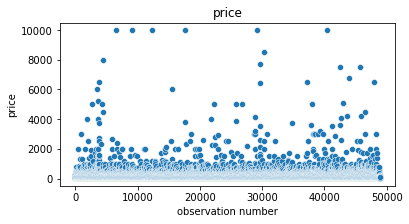

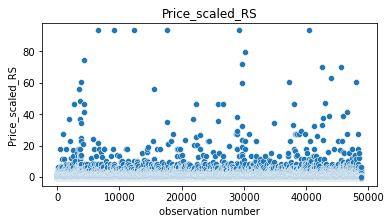

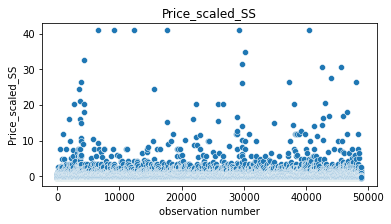

In [202]:
# check scalling effets
# scale has changed. with higly skewed data and outliers present robust scaler should be used over standard scaler
# it is more sutibale for data with outliers, because it is based on median and IQR
# after scalling median==0 & IQR==1 
df_scalling_effet = df[["price", "Price_scaled_RS", "Price_scaled_SS"]]

for column in df_scalling_effet.columns:
    plt.figure(figsize=(6, 3))
    sns.scatterplot(x=df.index, y=column, data=df[["price", "Price_scaled_RS", "Price_scaled_SS"]])
    plt.xlabel("observation number")
    plt.title(column);

In [203]:
# dropping one of the scaling (standard scaler)
df.drop(columns=["Price_scaled_SS"], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48870 entries, 0 to 48869
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   neighbourhood_group  48870 non-null  object 
 1   latitude             48870 non-null  float64
 2   longitude            48870 non-null  float64
 3   price                48870 non-null  int64  
 4   minimum_nights       48870 non-null  int64  
 5   number_of_reviews    48870 non-null  int64  
 6   Price_scaled_RS      48870 non-null  float64
dtypes: float64(3), int64(3), object(1)
memory usage: 2.6+ MB


In [204]:
# renaming a column
df.rename({"Price_scaled_RS": "price_scaled"}, axis=1, inplace=True)
df.columns

Index(['neighbourhood_group', 'latitude', 'longitude', 'price',
       'minimum_nights', 'number_of_reviews', 'price_scaled'],
      dtype='object')

In [205]:
# scalling does not apply to longitute and latitude, because they represent geographic coordinates
# below scalling ramaing two features
df["minimum_nights_scaled"] = robust_scaler.fit_transform(df["minimum_nights"].to_numpy().reshape(-1, 1))
df["number_of_reviews_scaled"] = standard_scaler.fit_transform(df["number_of_reviews"].to_numpy().reshape(-1, 1))
df

neighbourhood_group  latitude  longitude  price  minimum_nights  \
0                Brooklyn  40.64749  -73.97237    149               1   
1               Manhattan  40.75362  -73.98377    225               1   
2               Manhattan  40.80902  -73.94190    150               3   
3                Brooklyn  40.68514  -73.95976     89               1   
4               Manhattan  40.79851  -73.94399     80              10   
...                   ...       ...        ...    ...             ...   
48865            Brooklyn  40.67853  -73.94995     70               2   
48866            Brooklyn  40.70184  -73.93317     40               4   
48867           Manhattan  40.81475  -73.94867    115              10   
48868           Manhattan  40.75751  -73.99112     55               1   
48869           Manhattan  40.76404  -73.98933     90               7   

       number_of_reviews  price_scaled  minimum_nights_scaled  \
0                      9      0.405660                  -0.50   
1                     45      1.122642                  -0.50   
2                      0      0.415094                   0.00   
3                    270     -0.160377                  -0.50   
4                      9     -0.245283                   1.75   
...                  ...           ...                    ...   
48865                  0     -0.339623                  -0.25   
48866                  0     -0.622642                   0.25   
48867                  0      0.084906                   1.75   
48868                  0     -0.481132                  -0.50   
48869                  0     -0.150943                   1.00   

       number_of_reviews_scaled  
0                     -0.320432  
1                      0.487541  
2                     -0.522425  
3                      5.537374  
4                     -0.320432  
...                         ...  
48865                 -0.522425  
48866                 -0.522425  
48867                 -0.522425  
48868                 -0.522425  
48869                 -0.522425  

[48870 rows x 9 columns]

<a id='creating_a_model'></a>

# Creating a model

In [206]:
# creating a dataframe for KMeans model with scalled data
df_for_clustering = df[["price_scaled", "minimum_nights_scaled", "number_of_reviews_scaled", "latitude", "longitude"]]

In [207]:
# create KMeans model
# chart reprenting optimal cluster numbers is presented below
kmeans = KMeans(random_state=2023)

parameter_grid = {"n_clusters": [6, 8, 10],
                  "init": ["k-means++", "random"],
                  "n_init": [10, 15],
                  "max_iter": [1000]}

grid_search_insatnce = GridSearchCV(estimator=kmeans,
                                    param_grid=parameter_grid,
                                    cv=5) # in case of KMeans CV helps with stability of the clustering

grid_search_insatnce.fit(df_for_clustering)

GridSearchCV(cv=5, estimator=KMeans(random_state=2023),
             param_grid={'init': ['k-means++', 'random'], 'max_iter': [1000],
                         'n_clusters': [6, 8, 10], 'n_init': [10, 15]})

In [208]:
# find out what the best parameters are
# although optimal n_clusters = 10, final no of clusters will be determine below
grid_search_insatnce.best_estimator_

KMeans(max_iter=1000, n_clusters=10, n_init=15, random_state=2023)

<a id='Choosing_optimal_cluster_number'></a>

# Choosing optimal cluster number

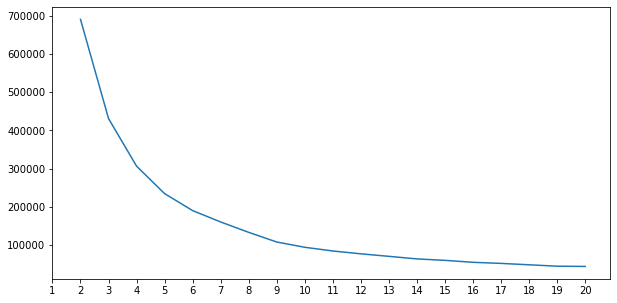

In [209]:
# visualise optimal k using inertia
# Inertia measures the sum of squared distances between each data point and its closest centroid
# lower inertia value means that the clusters are tighter
# when cluster reached number 10, then inertia lowering realtively slower
# number of clusters = 10 would be adequate number of clusters
# getting too many clusters is not very helpful

k_vector = []
inertia_vector = []
plt.figure(figsize=(10, 5))

for k in range(2, 20+1):
    km = KMeans(n_clusters=k,
                random_state=2023,
                init="k-means++",
                n_init=15,
                max_iter=1000).fit(df_for_clustering)
    k_vector.append(k)
    inertia_vector.append(km.inertia_)

plt.plot(k_vector, inertia_vector)
plt.xticks(range(1,21));

In [210]:
# fitting final KMean model
km = KMeans(n_clusters=10,
            random_state=2023,
            init="k-means++",
            n_init=15,
            max_iter=1000).fit(df_for_clustering)

In [211]:
# assign cluster labels to a dataframe
df["cluster"] = km.labels_
df

neighbourhood_group  latitude  longitude  price  minimum_nights  \
0                Brooklyn  40.64749  -73.97237    149               1   
1               Manhattan  40.75362  -73.98377    225               1   
2               Manhattan  40.80902  -73.94190    150               3   
3                Brooklyn  40.68514  -73.95976     89               1   
4               Manhattan  40.79851  -73.94399     80              10   
...                   ...       ...        ...    ...             ...   
48865            Brooklyn  40.67853  -73.94995     70               2   
48866            Brooklyn  40.70184  -73.93317     40               4   
48867           Manhattan  40.81475  -73.94867    115              10   
48868           Manhattan  40.75751  -73.99112     55               1   
48869           Manhattan  40.76404  -73.98933     90               7   

       number_of_reviews  price_scaled  minimum_nights_scaled  \
0                      9      0.405660                  -0.50   
1                     45      1.122642                  -0.50   
2                      0      0.415094                   0.00   
3                    270     -0.160377                  -0.50   
4                      9     -0.245283                   1.75   
...                  ...           ...                    ...   
48865                  0     -0.339623                  -0.25   
48866                  0     -0.622642                   0.25   
48867                  0      0.084906                   1.75   
48868                  0     -0.481132                  -0.50   
48869                  0     -0.150943                   1.00   

       number_of_reviews_scaled  cluster  
0                     -0.320432        8  
1                      0.487541        0  
2                     -0.522425        8  
3                      5.537374        7  
4                     -0.320432        8  
...                         ...      ...  
48865                 -0.522425        8  
48866                 -0.522425        8  
48867                 -0.522425        8  
48868                 -0.522425        8  
48869                 -0.522425        8  

[48870 rows x 10 columns]

In [212]:
# clusters x neighbourhood matrix - check number of obervations in each cluster
result = df.groupby(["cluster", "neighbourhood_group"])["cluster"].count()
result = result.unstack(fill_value=0)
result.style.background_gradient(cmap="Greens")


<a id='Evaluation'></a>

# Evaluation

In [213]:
# inertia
# inertia depends from number of cluster choosen
# number of cluster = 10 which was the optimal point for generalisation
km.inertia_

93485.43222129894

In [214]:
# silhouette score ranges from -1 to 1, where a higher value indicates a better clustering
# relatively high silhouette score
silhouette_total = silhouette_score(df_for_clustering, km.labels_)
silhouette_total

0.46415668319687803

In [215]:
# check mean silhouette for each cluster
# relatively hight silhouette in each cluster
silhouette_samples = silhouette_samples(df_for_clustering, km.labels_)

for cluster in list(set(km.labels_)):
    cluster_samples = silhouette_samples[km.labels_ == cluster]
    average_silhouette_score = np.mean(cluster_samples)
    print(f"Cluster: {cluster}  ||  Average Silhouette Score: {round(average_silhouette_score,2)}")
    

Cluster: 0  ||  Average Silhouette Score: 0.3
Cluster: 1  ||  Average Silhouette Score: 0.74
Cluster: 2  ||  Average Silhouette Score: 0.7
Cluster: 3  ||  Average Silhouette Score: 0.45
Cluster: 4  ||  Average Silhouette Score: 0.75
Cluster: 5  ||  Average Silhouette Score: 0.47
Cluster: 6  ||  Average Silhouette Score: 0.37
Cluster: 7  ||  Average Silhouette Score: 0.38
Cluster: 8  ||  Average Silhouette Score: 0.47
Cluster: 9  ||  Average Silhouette Score: 0.39


<a id='Visualizations'></a>

# Visualizations

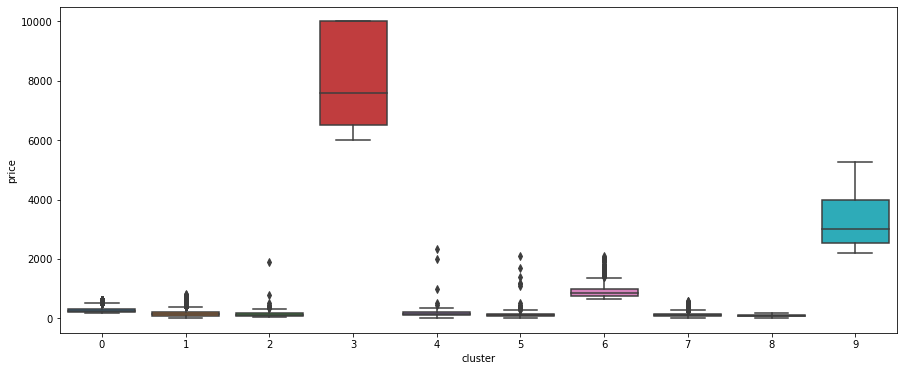

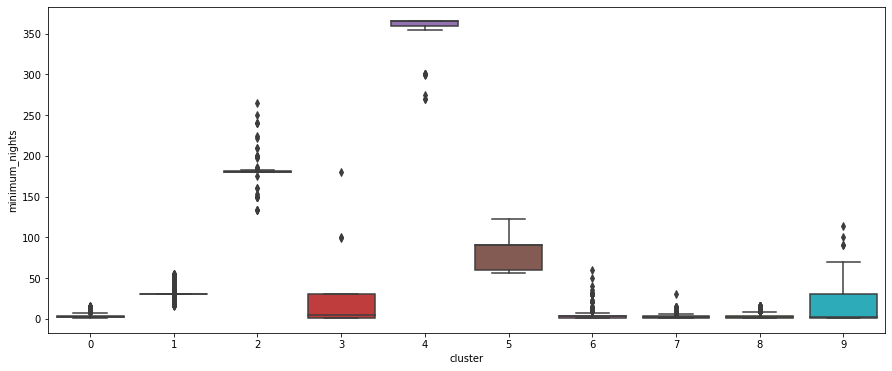

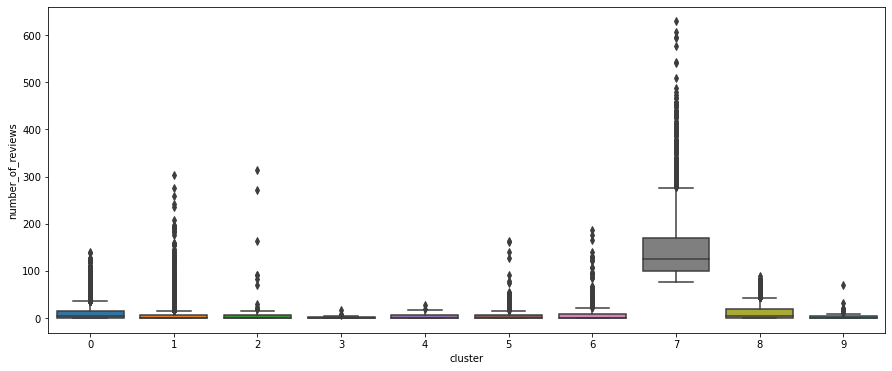

In [216]:
# check how ech feature differ in each cluster
for column in ["price", "minimum_nights", "number_of_reviews"]:
    plt.figure(figsize=(15, 6))
    sns.boxplot(x="cluster", y=column, data=df)

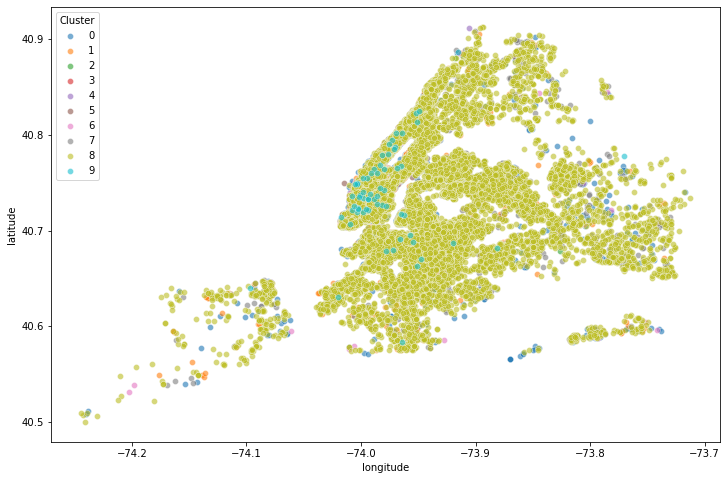

In [217]:
# vizualize clusters on geographical coordinates
# if we would use only coordinates as our features, then NY map would look completely different
# here we can see that other features have significant influence. Dots are covering eachother on map
map_df = df[["latitude", "longitude", "cluster"]]
plt.figure(figsize=(12, 8))
for cluster in sorted(map_df["cluster"].unique()):
    chart_cluster = map_df[map_df["cluster"] == cluster]
    sns.scatterplot(x="longitude", y="latitude", data=chart_cluster, label=cluster, alpha=0.6)

plt.legend(title="Cluster", loc="upper left", ncol=1);


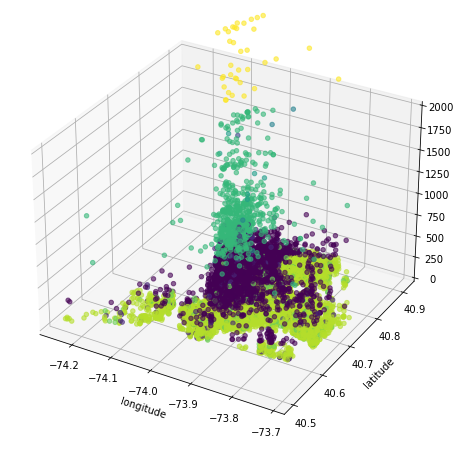

In [218]:
# vizualize clusters on 3D chart using coordinates and prices
df_for_3d_chart = df[["latitude", "longitude", "price", "cluster"]]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=df_for_3d_chart["longitude"], ys=df_for_3d_chart["latitude"], zs=df_for_3d_chart["price"], c=df_for_3d_chart["cluster"], alpha=0.6)
ax.set_xlabel("longitude")
ax.set_ylabel("latitude")
ax.set_zlim(0, 2000)
plt.show()

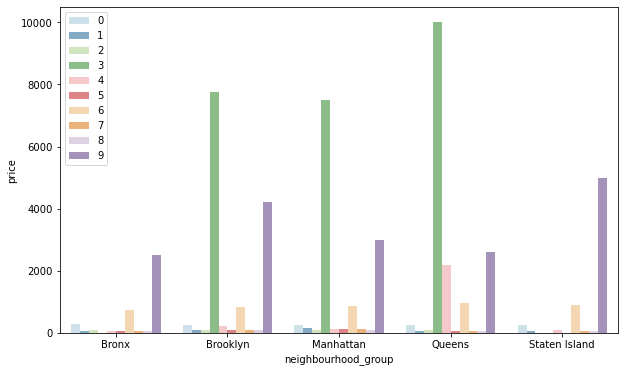

In [228]:
# below chart proving that price is important factor of clustering
# some of the high priced listings are present in different neighbourhoods for the same cluster
hood_price_cluster = df.groupby(by=["cluster","neighbourhood_group"])["price"].median().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x="neighbourhood_group", y="price", data=hood_price_cluster, hue="cluster", alpha=0.6, palette="Paired")
plt.legend(loc="upper left");

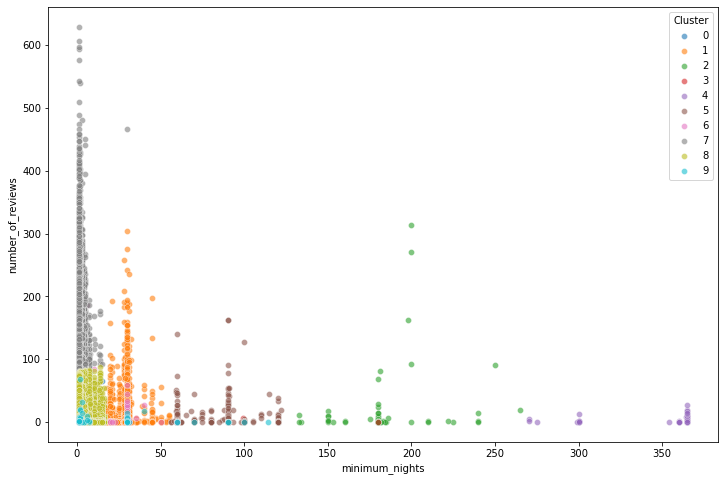

In [220]:
# below chart proving that number of reviews and minimum nights are also important
plt.figure(figsize=(12, 8))
for cluster in sorted(df["cluster"].unique()):
    chart_cluster = df[df["cluster"] == cluster]
    sns.scatterplot(x="minimum_nights", y="number_of_reviews", data=chart_cluster, label=cluster, alpha=0.6)

plt.legend(title="Cluster", loc="upper right", ncol=1);

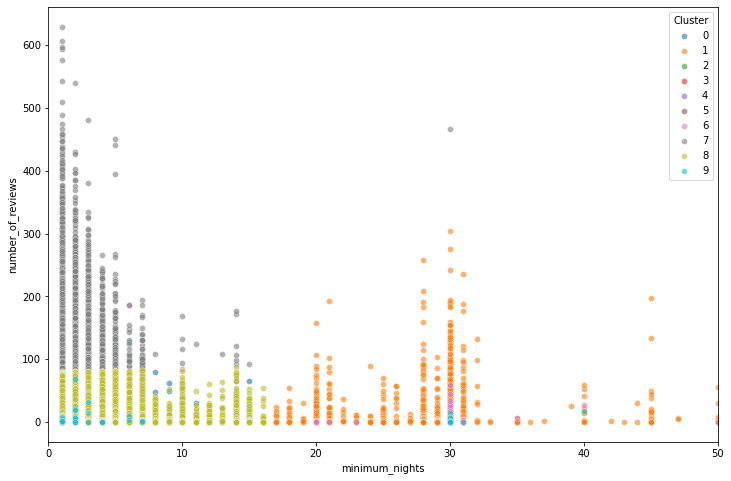

In [221]:
# zoom at smaller number of minimum nights
plt.figure(figsize=(12, 8))
for cluster in sorted(df["cluster"].unique()):
    chart_cluster = df[df["cluster"] == cluster]
    sns.scatterplot(x="minimum_nights", y="number_of_reviews", data=chart_cluster, label=cluster, alpha=0.6)

plt.xlim(0, 50)
plt.legend(title="Cluster", loc="upper right", ncol=1);

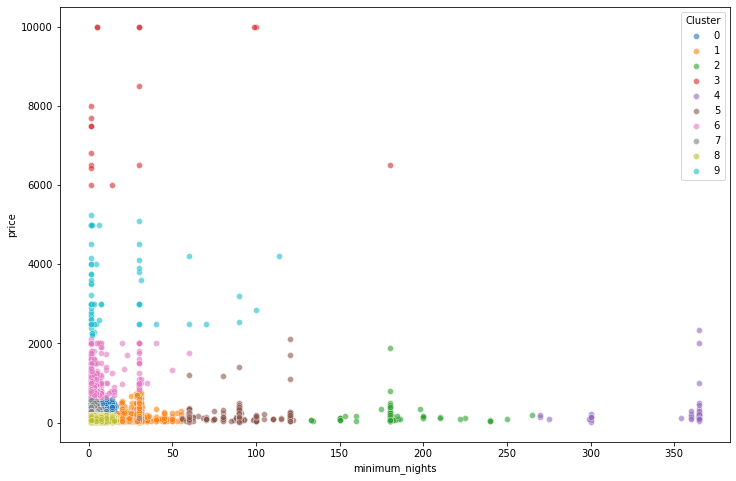

In [222]:
# visualise minimum nights and price 
# clusters are even more distinguished than on previes chart 
plt.figure(figsize=(12, 8))
for cluster in sorted(df["cluster"].unique()):
    chart_cluster = df[df["cluster"] == cluster]
    sns.scatterplot(x="minimum_nights", y="price", data=chart_cluster, label=cluster, alpha=0.6)

plt.legend(title="Cluster", loc="upper right", ncol=1);

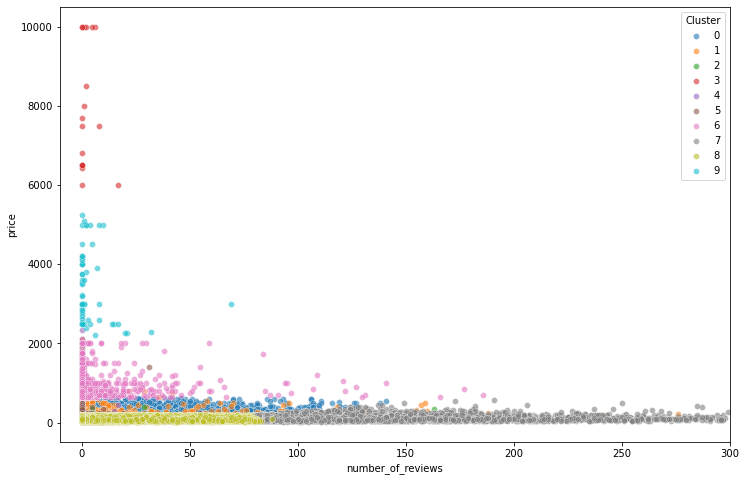

In [234]:
# visualise number of reviews and price 
# clusters are even more distinguished than on previes chart 
plt.figure(figsize=(12, 8))
for cluster in sorted(df["cluster"].unique()):
    chart_cluster = df[df["cluster"] == cluster]
    sns.scatterplot(x="number_of_reviews", y="price", data=chart_cluster, label=cluster, alpha=0.6)

plt.legend(title="Cluster", loc="upper right", ncol=1)
plt.xlim(-10, 300);

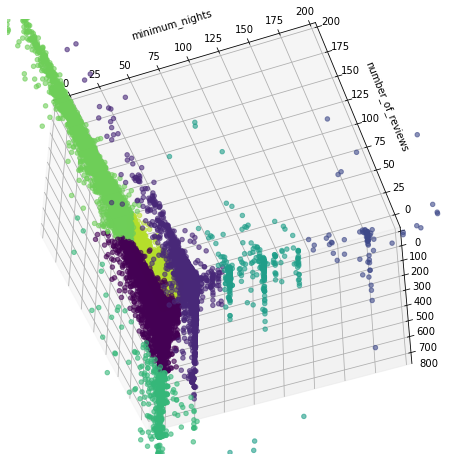

In [236]:
# visualise number of reviews, price, minimum nigts all together in zoom
df_for_3d_chart2 = df[["number_of_reviews", "minimum_nights", "price", "cluster"]]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=df_for_3d_chart2["minimum_nights"], ys=df_for_3d_chart2["number_of_reviews"], zs=df_for_3d_chart2["price"], c=df_for_3d_chart2["cluster"], alpha=0.6)
ax.set_xlabel("minimum_nights")
ax.set_ylabel("number_of_reviews")
ax.view_init(elev=130, azim=250)
ax.set_xlim(-10, 200)
ax.set_ylim(-10, 200)
ax.set_zlim(-10, 850)
plt.show()